In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/dataset_phishing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
# Convert 'status' to numerical (0: legitimate, 1: phishing) for correlation analysis
df['status_encoded'] = df['status'].map({'legitimate':0,'phishing':1})
# Compute correlation matrix
correlation_matrix = df.drop(columns=['status','url']).corr()


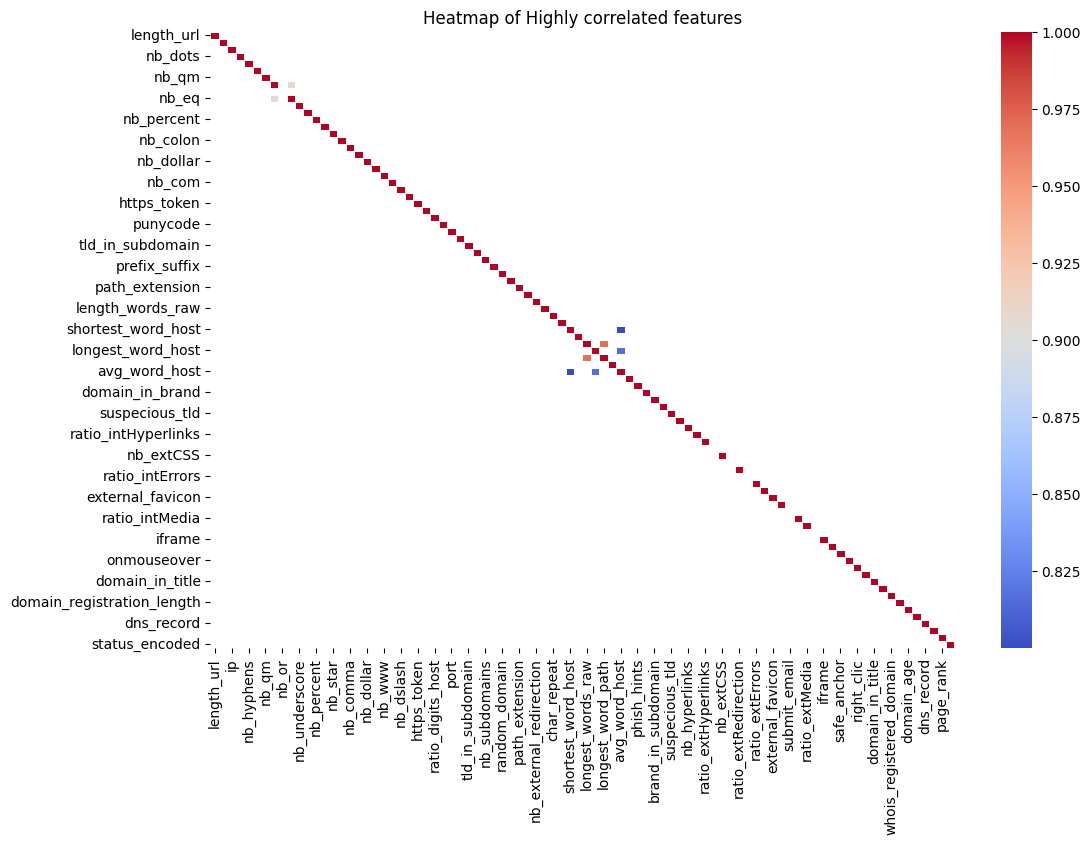

In [ ]:
# Plot heatmap for highly correlated features (absolute correlation ≥ 0.8)
plt.figure(figsize =(12,8))
sns.heatmap(correlation_matrix[(correlation_matrix>=0.8)|(correlation_matrix<=-0.8)],annot= False,cmap ='coolwarm',linewidth =0.5,mask =(correlation_matrix<0.8)&(correlation_matrix>-0.8))
plt.title("Heatmap of Highly correlated features")
plt.show()

In [ ]:
# Identify Highly correlated feature pairs
high_corr_pairs = [(i,j,correlation_matrix.loc[i,j])for i in correlation_matrix.columns for j in correlation_matrix.columns if i!=j
                    and abs(correlation_matrix.loc[i,j])>=0.8]
high_corr_pairs

[('nb_and', 'nb_eq', np.float64(0.9064043216805505)),
 ('nb_eq', 'nb_and', np.float64(0.9064043216805505)),
 ('shortest_word_host', 'avg_word_host', np.float64(0.8000139779239729)),
 ('longest_words_raw', 'longest_word_path', np.float64(0.9685027593654828)),
 ('longest_word_host', 'avg_word_host', np.float64(0.8163134513577747)),
 ('longest_word_path', 'longest_words_raw', np.float64(0.9685027593654828)),
 ('avg_word_host', 'shortest_word_host', np.float64(0.8000139779239729)),
 ('avg_word_host', 'longest_word_host', np.float64(0.8163134513577747))]

In [ ]:
''' Correlation Analysis Results:
The heatmap highlights highly correlated features (|r| ≥ 0.8), which may introduce redundancy or multicollinearity.

Some of the strongest correlations include:

nb_and ↔ nb_eq (0.91) → Likely redundant.

longest_words_raw ↔ longest_word_path (0.97) → Strongly related.

shortest_word_host ↔ avg_word_host (0.80) → Possible redundancy.'''

' Correlation Analysis Results:\nThe heatmap highlights highly correlated features (|r| ≥ 0.8), which may introduce redundancy or multicollinearity.\n\nSome of the strongest correlations include:\n\nnb_and ↔ nb_eq (0.91) → Likely redundant.\n\nlongest_words_raw ↔ longest_word_path (0.97) → Strongly related.\n\nshortest_word_host ↔ avg_word_host (0.80) → Possible redundancy.'

In [ ]:
# Next, I'll perform feature importance analysis using tree-based models and statistical techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Prepare data for feature importance analysis
X = df.drop(columns=['url', 'status', 'status_encoded'])  # Exclude non-numeric columns
y = df['status_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a RandomForest model for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)
rf_importances = rf_model.feature_importances_

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Create DataFrame for ranked importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_Importance': rf_importances,
    'Mutual_Information': mi_scores
}).sort_values(by='RandomForest_Importance', ascending=False)




In [ ]:
'''Feature Importance Analysis:
Using RandomForest and Mutual Information, the top predictive features are:

google_index (Most important)

page_rank

nb_hyperlinks

web_traffic

domain_age

nb_www

phish_hints

ratio_intHyperlinks

longest_word_path

safe_anchor

These features contribute significantly to distinguishing phishing websites.
'''

'Feature Importance Analysis:\nUsing RandomForest and Mutual Information, the top predictive features are:\n\ngoogle_index (Most important)\n\npage_rank\n\nnb_hyperlinks\n\nweb_traffic\n\ndomain_age\n\nnb_www\n\nphish_hints\n\nratio_intHyperlinks\n\nlongest_word_path\n\nsafe_anchor\n\nThese features contribute significantly to distinguishing phishing websites.\n'

In [ ]:
# Feature Engineering: Creating New Features

# New Feature 1: URL entropy (measuring randomness in characters)
import numpy as np
from collections import Counter

def calculate_entropy(url):
    """Calculate Shannon entropy of characters in the URL."""
    prob = [freq / len(url) for freq in Counter(url).values()]
    return -sum(p * np.log2(p) for p in prob)

df['url_entropy'] = df['url'].apply(calculate_entropy)

# New Feature 2: Presence of sensitive keywords in URL
suspicious_keywords = ['login', 'secure', 'account', 'verify', 'bank', 'update']
df['suspicious_keyword'] = df['url'].apply(lambda x: any(keyword in x.lower() for keyword in suspicious_keywords)).astype(int)

# New Feature 3: Subdomain length
df['subdomain_length'] = df['length_hostname'] - df['length_url']

# Analyze correlation of new features with the target variable
new_features = ['url_entropy', 'suspicious_keyword', 'subdomain_length']
df[new_features + ['status_encoded']].corr()['status_encoded']

,status_encoded
url_entropy,0.336562
suspicious_keyword,0.333027
subdomain_length,-0.207269
status_encoded,1.000000


#### Objective: Train and evaluate multiple machine learning models.
Deliverables: A trained model with evaluation metrics and a performance comparison report.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

# Train & Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probability scores

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)

    results[name] = {"Accuracy": accuracy, "AUC-ROC": auc, "Report": report}

# Display Results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"AUC-ROC: {metrics['AUC-ROC']:.4f}")
    print(f"Classification Report:\n{metrics['Report']}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:46:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: Logistic Regression
Accuracy: 0.9361
AUC-ROC: 0.9814
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1143
           1       0.94      0.93      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286


Model: Random Forest
Accuracy: 0.9602
AUC-ROC: 0.9936
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1143
           1       0.96      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286


Model: XGBoost
Accuracy: 0.9663
AUC-ROC: 0.9936
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1143
   

In [ ]:
# All models give the accuracy above 95% with XGBoost is the best
# performing model with 0.9663 accuracy and AUC-ROC: 0.9936 score